In [1]:

import os
import numpy as np
import importlib
from numpy import linalg
import helperfuns 
from helperfuns import *
import scipy.stats as scs
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(precision=3, suppress = True)
# import pandas as pd

# for formatting tick labels
from matplotlib.ticker import FormatStrFormatter

# Figure 2. K = 0, D = 0

In [2]:
pcvec = np.arange(0.01,1,0.0001)
betavec = np.arange(0.01,1,0.0001)
PC, BETA = np.array(np.meshgrid(pcvec,betavec), dtype = float)
def SignCsK0D0(beta,u1):
    determinesSign = -1 + 4*(1-beta*u1)*u1
    to_return = np.array(determinesSign>0, dtype = int)
    return(to_return)
def fun_u1_K0(pc,beta):
    u1hat = ((1+3*pc+pc*beta)-np.sqrt((1+3*pc+pc*beta)**2-16*pc**2*beta))/(4*pc*beta)
    return(u1hat)

U1 = fun_u1_K0(PC,BETA)
Xinvades = SignCsK0D0(BETA,U1)

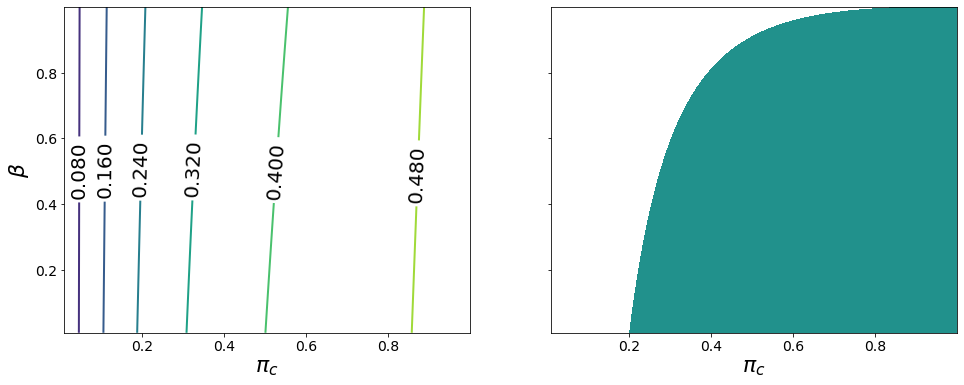

In [4]:
 #Define a class that forces representation of float to have only one decimal point if there's a trailing z

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,6))

CS = ax1.contour(PC,BETA,U1, linewidths = 2)
#ax1.clabel(CS,CS.levels,fontsize=12, rightside_up = True, inline_spacing=3)


#fix the labels so they don't go off the axis

xmin,xmax,ymin,ymax = ax1.axis()
# middle of the figure:
mid = ((xmin+xmax)/2, (ymin + ymax)/2)

# find new position sof labels that are cose to center
label_pos = []
for line in CS.collections:
    for path in line.get_paths():
        vert = path.vertices
        
        #find closest point
        dist = np.linalg.norm(vert-mid,ord=2,axis=1)
        min_ind = np.argmin(dist)
        label_pos.append(vert[min_ind,:])
        
#draw labels
ax1.clabel(CS,inline=True,inline_spacing=3,colors = 'k', fontsize = 20, rightside_up=True, manual = label_pos)
CF = ax2.contourf(PC,BETA,Xinvades, levels = [0.5,1.5])

ax1.set_xlabel('$\pi_c$', fontsize = 22)
ax2.set_xlabel('$\pi_c$', fontsize = 22)
ax1.set_ylabel('$\\beta$', fontsize = 22)
#both plots have teh same axes so don't need labels of right plot's y-axis
ax2.axes.yaxis.set_ticklabels([])
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

fig.savefig('/Users/taliaborofsky/Documents/Stanford/Research/Feldman/Ecology of Learning/Conformism/Paper_to_Submit_EcoMono2/xinvadesK0D0.png')